In [3]:
!pip install semopy
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 15.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.10-py3-none-any.whl size=1659681 sha256=0fbbb37a15425234af283dfd02ee2ffcbc45ae3854630eb8ec9d8e3afb82e3b0
  Stored in directory: /Users/sanchanex/Library/Caches/pip/wheels/75/26/79/3c753714cd23a37b041ddfe864cb22f8be0736aeb77371733e
Successfully built semopy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.7 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import semopy
from semopy import Model
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# データ読み込み
目的変数: pgi（ネットワーク図で最も多くの変数から影響を受けていた変数）

In [18]:
df = pd.read_excel('../data/231021-1110_AI用qPCRデータ.xlsx', index_col=0, header=1)
df = df.dropna()
df = df.reset_index(drop=True)
df.rename(columns={'pgi': 'target'}, inplace=True)
col_target = df['target']
df.drop('target', axis=1, inplace=True)
df['target'] = col_target
df.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA,target
0,0.000004,2.982088e-05,0.000004,1.512045e-05,0.000015,9.403729e-07,0.000122,0.000015,4.792578e-07,0.000007,...,0.000121,1.193258e-07,0.000119,0.000004,0.000008,0.000015,0.000030,0.000015,0.000030,0.000029
1,0.000008,3.062644e-05,0.000016,2.940716e-08,0.000015,3.847846e-06,0.000124,0.000015,3.848767e-06,0.000015,...,0.000123,2.377373e-07,0.000123,0.000008,0.000016,0.000031,0.000061,0.000031,0.000061,0.000062
2,0.000008,7.608227e-06,0.000016,1.396326e-08,0.000031,9.615077e-07,0.000245,0.000015,4.864569e-07,0.000031,...,0.000122,9.666787e-07,0.000122,0.000008,0.000016,0.000062,0.000062,0.000031,0.000062,0.000063
3,0.000004,1.513944e-05,0.000015,1.225795e-07,0.000015,4.807837e-07,0.000124,0.000015,1.207673e-07,0.000008,...,0.000061,2.410427e-07,0.000061,0.000004,0.000008,0.000031,0.000062,0.000031,0.000062,0.000031
4,0.000008,4.768491e-07,0.000031,6.105349e-08,0.000031,9.593193e-07,0.000124,0.000015,2.428970e-07,0.000016,...,0.000124,4.795912e-07,0.000124,0.000008,0.000008,0.000031,0.000062,0.000031,0.000062,0.000063


In [19]:
# 標準化
scaler = StandardScaler()
df_std_array = scaler.fit_transform(df)
# DataFrame型に変換
df_std = pd.DataFrame(df_std_array, columns=df.columns)
df_std.head()

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA,target
0,-0.478000,-0.145310,-0.186724,-0.126510,-0.296711,-0.196438,-0.139036,-0.099555,-0.150187,-0.270711,...,0.040025,-1.144075,0.233070,-0.251672,-0.181602,-0.634371,-0.893224,-0.429545,-0.422568,-0.241018
1,-0.383090,-0.128682,-0.145902,-0.489821,-0.295543,-0.142752,-0.133647,-0.091603,-0.063683,-0.124194,...,0.058741,-1.142809,0.286622,-0.169224,0.018884,-0.543704,-0.337397,-0.029556,-0.000408,-0.118717
2,-0.383244,-0.603811,-0.145725,-0.490193,-0.202170,-0.196047,0.304820,-0.097057,-0.150002,0.169103,...,0.047084,-1.135013,0.269307,-0.167799,0.018553,-0.361239,-0.327326,-0.023438,0.014527,-0.117759
3,-0.474655,-0.448356,-0.146414,-0.487578,-0.295412,-0.204924,-0.134080,-0.091420,-0.159391,-0.265981,...,-0.497192,-1.142773,-0.569801,-0.247454,-0.176755,-0.542129,-0.331676,-0.026711,0.011130,-0.232941
4,-0.381724,-0.751012,-0.092042,-0.489059,-0.202648,-0.196088,-0.131768,-0.092339,-0.156255,-0.120486,...,0.069196,-1.140222,0.292835,-0.167704,-0.173408,-0.542300,-0.325350,-0.021763,0.007818,-0.116240


# 基礎分析（相関の確認）
目的: 仮説を考えるための基礎分析

In [20]:
df_std_corr = df_std.corr()
df_std_corr

,glk,agp,yihX,pgm,ptsG,malx,crr,galM,yihR,yeaD,...,gapA,pgk,gpmA,ytjc,gpmM,eno,pykF,pykA,ppsA,target
glk,1.000000,0.822862,0.371540,0.618967,0.605076,0.905731,0.165481,0.861864,0.920416,0.696541,...,0.616828,0.489707,0.528607,0.861143,0.886131,0.232713,0.679769,0.822393,0.459227,0.181680
agp,0.822862,1.000000,0.216120,0.420514,0.402403,0.824608,0.219905,0.939306,0.850387,0.646634,...,0.709937,0.620281,0.700043,0.946976,0.853974,0.242554,0.620513,0.876497,0.579999,0.215118
yihX,0.371540,0.216120,1.000000,0.897516,0.898684,0.540383,0.043252,0.364667,0.413146,0.439540,...,0.141967,0.103913,0.174226,0.255037,0.391999,0.093139,0.635732,0.194060,0.077083,0.082427
pgm,0.618967,0.420514,0.897516,1.000000,0.908202,0.683975,0.103822,0.574322,0.611020,0.601141,...,0.442104,0.354116,0.370511,0.432541,0.595189,0.247443,0.765729,0.472589,0.356712,0.134081
ptsG,0.605076,0.402403,0.898684,0.908202,1.000000,0.743452,0.117582,0.561566,0.545678,0.541357,...,0.290198,0.288324,0.299506,0.448566,0.508467,0.172278,0.656433,0.350717,0.211518,0.131758
malx,0.905731,0.824608,0.540383,0.683975,0.743452,1.000000,0.141145,0.886780,0.915940,0.706298,...,0.517575,0.403930,0.499513,0.900936,0.872831,0.167443,0.646430,0.760825,0.366647,0.159772
crr,0.165481,0.219905,0.043252,0.103822,0.117582,0.141145,1.000000,0.187957,0.143303,0.705006,...,0.209139,0.170752,0.217490,0.152950,0.322398,0.098859,0.216336,0.180966,0.249891,0.086402
galM,0.861864,0.939306,0.364667,0.574322,0.561566,0.886780,0.187957,1.000000,0.869959,0.683186,...,0.744742,0.651045,0.698369,0.937758,0.868715,0.303577,0.679349,0.879672,0.641900,0.229262
yihR,0.920416,0.850387,0.413146,0.611020,0.545678,0.915940,0.143303,0.869959,1.000000,0.748391,...,0.584028,0.395002,0.497229,0.916633,0.970154,0.173500,0.666923,0.868880,0.438859,0.150448
yeaD,0.696541,0.646634,0.439540,0.601141,0.541357,0.706298,0.705006,0.683186,0.748391,1.000000,...,0.554190,0.386486,0.454375,0.654746,0.847673,0.248428,0.628687,0.680724,0.485076,0.146335


<AxesSubplot:>

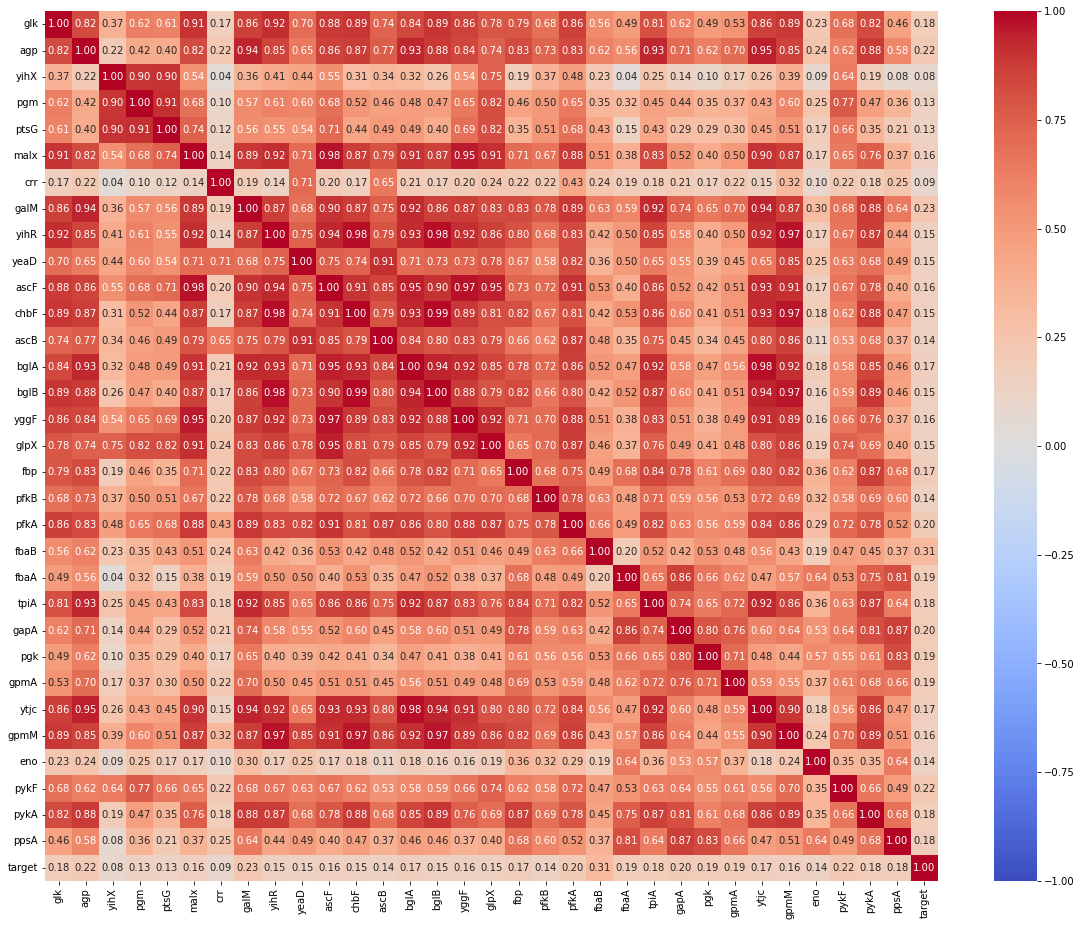

In [21]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_std_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")

目的変数と最も相関が強いのは, fbaB, galM, agp, pykFの順<br>
最も相関が弱いのは, yihX, crrの順<br>
そのほかは0.16 ~ 0.20で横ばい

## 仮説
* target(pgi)は，bglBから説明される
* target(pgi)は，yihRから説明される
* target(pgi)は，yihXから説明される


In [22]:
desc = '''
# 測定モデル

# 構造モデル

# 共変関係

'''